# BEE 4750 Homework 2: Dissolved Oxygen

**Name**:

**ID**:

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/hw02-teaganraesmith`


In [2]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [22]:
function dissolved_oxygen(x, Cs, U, C0, B0, N0, ka, kc, kn)
    a1=exp(-ka*x/U)
    a2=(kc/(ka-kc))*(exp(-kc*x/U)-a1)
    a3=(kn/(ka-kn))*(exp(-kn*x/U)-a1)
    C=Cs*(1-a1)+(C0*a1)-(B0*a2)-(N0*a3)
    return C
end
#Distances
x_step=1
x1_max=15000
x1=0:x_step:x1_max

#Constant Values
ka=.55
kc=.35
kn=.25
Cs=10;
U=6000

#River Values
Cr=7.5 #DO river
Qr=100000 #River flow
Nr=5 #NBOD river
Br=5 #CBOD river

#Waste Stream 1 Values
Cw1=5
Qw1=10000
Nw1=35
Bw1=50

#Waste Stream 2 Values
Qr2=Qw1+Qr
Cw2=5
Qw2=15000
Nw2=35
Bw2=45

#Mixed Values (first discharge)
C01=(Cr*Qr+Cw1*Qw1)/(Qr+Qw1) #DO mixed
N01=(Nr*Qr+Nw1*Qw1)/(Qr+Qw1) #NBOD mixed
B01=(Br*Qr+Bw1*Qw1)/(Qr+Qw1) #CBOD mixed

C1=(y-> dissolved_oxygen(y, Cs, U, C01, B01, N01, ka, kc, kn)).(x1)

#Taking ending CBOD and NBOD values at 15km to mix
B_15km=B01*exp(-kc*15000/U)
N_15km=N01*exp(-kn*15000/U)

#Distances
C_15km=C1[15001]
x2_max=50000
x2=(x1_max+1):x_step:x2_max

#Mixed Values (second discharge)
C02=(C_15km*Qr2+Cw2*Qw2)/(Qr2+Qw2) #DO mixed
N02=(N_15km*Qr2+Nw2*Qw2)/(Qr2+Qw2) #NBOD mixed
B02=(B_15km*Qr2+Bw2*Qw2)/(Qr2+Qw2) #CBOD mixed

C2=(y-> dissolved_oxygen(y, Cs, U, C02, B02, N02, ka, kc, kn)).(x2)
C=append!(C1,C2)

max_oxygen=-Inf
max_idx=0
for idx in 1:lastindex(C)
    oxygen_value=C[idx]
    if (oxygen_value>max_oxygen)
        max_oxygen=oxygen_value
        max_idx=idx
    end
end

println("Max Dissolved Oxygen Level:  ", max_oxygen," mg/L", ";   Location Downstream:  ", max_idx-1, "m")


Max Dissolved Oxygen Level:  8.530189091235808 mg/L;   Location Downstream:  50000m


### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

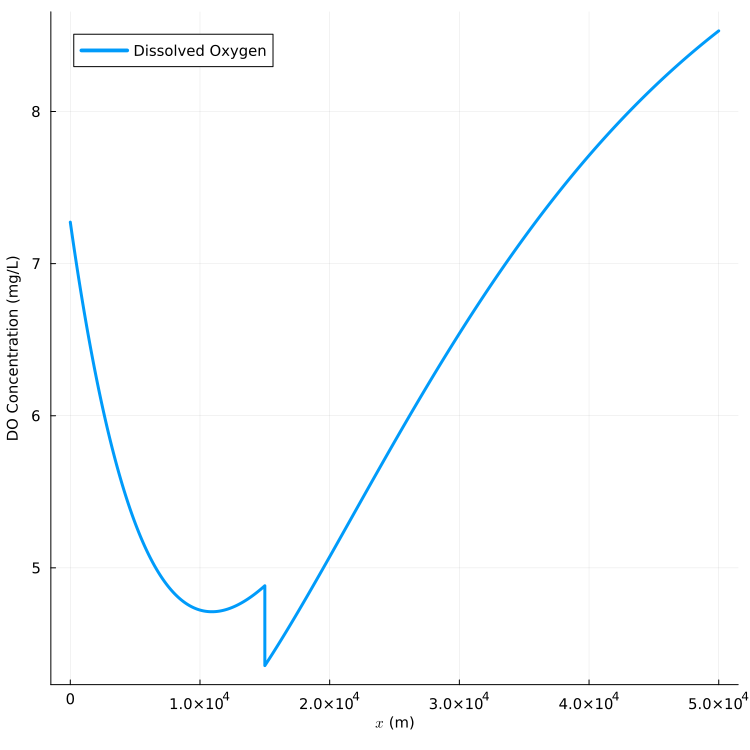

In [24]:
using Plots
x=0:x_step:50000
plot(x, C; linewidth=3, 
    label="Dissolved Oxygen", 
    tickfontsize=10, 
    guidefontsize=10, 
    legendfontsize=10)
xlabel!(L"$x$ (m)")
ylabel!("DO Concentration (mg/L)")
plot!(size=(750, 750))

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [1]:
function dissolved_oxygen(x, Cs, U, C0, B0, N0, ka, kc, kn)
    a1=exp(-ka*x/U)
    a2=(kc/(ka-kc))*(exp(-kc*x/U)-a1)
    a3=(kn/(ka-kn))*(exp(-kn*x/U)-a1)
    C=Cs*(1-a1)+(C0*a1)-(B0*a2)-(N0*a3)
    return C
end

#Distances
x_step=1
x1_max=15000
x1=0:x_step:x1_max

#Constant Values
ka=.55
kc=.35
kn=.25
Cs=10;
U=6000

#River Values
Cr=7.5 #DO river
Qr=100000 #River flow
Nr=5 #NBOD river
Br=5 #CBOD river

#Waste Stream 1 Values
Cw1=5
Qw1=10000
Nw1=35
Bw1=50

#Waste Stream 2 Values
Qr2=Qw1+Qr
Cw2=5
Qw2=15000
Nw2=35
Bw2=45

#Mixed Values (first discharge)
C01=(Cr*Qr+Cw1*Qw1)/(Qr+Qw1) #DO mixed
N01=(Nr*Qr+Nw1*Qw1)/(Qr+Qw1) #NBOD mixed
B01=(Br*Qr+Bw1*Qw1)/(Qr+Qw1) #CBOD mixed

C1=(y-> dissolved_oxygen(y, Cs, Qr, C01, B01, N01, ka, kc, kn)).(x1)

#Taking ending CBOD and NBOD values at 15km to mix
B_15km=B01*exp(-kc*15000/U)
N_15km=N01*exp(-kn*15000/U)

#Distances
C_15km=C1[15001]
x2_max=50000
x2=(x1_max+1):x_step:x2_max

#Mixed Values (second discharge)
C02=(C_15km*Qr2+Cw2*Qw2)/(Qr2+Qw2) #DO mixed
N02=(N_15km*Qr2+Nw2*Qw2)/(Qr2+Qw2) #NBOD mixed
B02=(B_15km*Qr2+Bw2*Qw2)/(Qr2+Qw2) #CBOD mixed

C2=(y-> dissolved_oxygen(y, Cs, U, C02, B02, N02, ka, kc, kn)).(x2)
C=append!(C1,C2)

oxygen_value=-Inf
idx=15002
while oxygen_value<=6 && idx<50000
        oxygen_value=C[idx]
        global idx=idx+1
end

distance=idx-15000
print("The distance from waste stream 2 until DO > 6mg/L: ", distance, "m", "  Which is  ", idx, "m  from the start of the river")

The distance from waste stream 2 until DO > 6mg/L: 10028m  Which is  25028m  from the start of the river

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

In [18]:
function dissolved_oxygen(x, Cs, U, C0, B0, N0, ka, kc, kn)
    a1=exp(-ka*x/U)
    a2=(kc/(ka-kc))*(exp(-kc*x/U)-a1)
    a3=(kn/(ka-kn))*(exp(-kn*x/U)-a1)
    C=Cs*(1-a1)+(C0*a1)-(B0*a2)-(N0*a3)
    return C
end

#Distances
x_step=1
x1_max=15000
x1=0:x_step:x1_max

#Constant Values
ka=.55
kc=.35
kn=.25
Cs=10;
U=6000

#River Values
Cr=7.5 #DO river
Qr=100000 #River flow
Nr=5 #NBOD river
Br=5 #CBOD river

#Waste Stream 1 Values
Cw1=5
Qw1=10000
Nw1=35
Bw1=50

#Waste Stream 2 Values
Qr2=Qw1+Qr
Cw2=5
Qw2=15000
Nw2=35
Bw2=45

#Mixed Values (first discharge)
C01=(Cr*Qr+Cw1*Qw1)/(Qr+Qw1) #DO mixed
N01=(Nr*Qr+Nw1*Qw1)/(Qr+Qw1) #NBOD mixed
B01=(Br*Qr+Bw1*Qw1)/(Qr+Qw1) #CBOD mixed

C1=(y-> dissolved_oxygen(y, Cs, U, C01, B01, N01, ka, kc, kn)).(x1)

#Taking ending CBOD and NBOD values at 15km to mix
B_15km=B01*exp(-kc*15000/U)
N_15km=N01*exp(-kn*15000/U)

#Distances
C_15km=C1[15001]
x2_max=50000
x2=(x1_max+1):x_step:x2_max

check=false;
Percent=0;
while (check==false) && Percent<100
    global Percent=Percent+1
    N01_new=N_15km*(1-Percent/100)
    B01_new=B_15km*(1-Percent/100)
    C02=(C_15km*Qr2+Cw2*Qw2)/(Qr2+Qw2) #DO mixed
    N02=(N01_new*Qr2+Nw2*Qw2)/(Qr2+Qw2) #NBOD mixed
    B02=(B01_new*Qr2+Bw2*Qw2)/(Qr2+Qw2) #CBOD mixed
    C2=(y-> dissolved_oxygen(y, Cs, U, C02, B02, N02, ka, kc, kn)).(x2)
    check_for_less=false
    idx=0
    while (check_for_less==false) && idx<length(C2)
        idx=idx+1
            if C2[idx]<4.4
                check_for_less=true
            end
    end
    if (check_for_less==false)
        check=true
    end
end
Needed_Percent=Percent/100
print("The Percent Treatment Needed is:  ", Needed_Percent)

The Percent Treatment Needed is:  0.03

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

In [16]:
function dissolved_oxygen(x, Cs, U, C0, B0, N0, ka, kc, kn)
    a1=exp(-ka*x/U)
    a2=(kc/(ka-kc))*(exp(-kc*x/U)-a1)
    a3=(kn/(ka-kn))*(exp(-kn*x/U)-a1)
    C=Cs*(1-a1)+(C0*a1)-(B0*a2)-(N0*a3)
    return (C)
end
#Distances
x_step=1
x1_max=15000
x1=0:x_step:x1_max

#Constant Values
ka=.55
kc=.35
kn=.25
Cs=10;
U=6000

#River Values
Cr=7.5 #DO river
Qr=100000 #River flow
Nr=5 #NBOD river
Br=5 #CBOD river

#Waste Stream 1 Values
Cw1=5
Qw1=10000
Nw1=35
Bw1=50

#Waste Stream 2 Values
Qr2=Qw1+Qr
Cw2=5
Qw2=15000
Nw2=35
Bw2=45

#Mixed Values (first discharge)
C01=(Cr*Qr+Cw1*Qw1)/(Qr+Qw1) #DO mixed
N01=(Nr*Qr+Nw1*Qw1)/(Qr+Qw1) #NBOD mixed
B01=(Br*Qr+Bw1*Qw1)/(Qr+Qw1) #CBOD mixed


check=false;
Percent=0;
while (check==false) && Percent<100
    global Percent=Percent+1
    #Waste stream 1 values
    Nw1_new=Nw1*(1-Percent/100)
    Bw1_new=Bw1*(1-Percent/100)
    C01=(Cr*Qr+Cw1*Qw1)/(Qr+Qw1) #DO mixed
    N01=(Nr*Qr+Nw1*Qw1)/(Qr+Qw1) #NBOD mixed
    B01=(Br*Qr+Bw1_new*Qw1)/(Qr+Qw1) #CBOD mixed
    C1=(y-> dissolved_oxygen(y, Cs, U, C01, B01, N01, ka, kc, kn)).(x1)
    
    #Taking ending CBOD and NBOD values from function to mix
    B_15km=B01*exp(-kc*15000/U)
    N_15km=N01*exp(-kn*15000/U)

    #Distances
    C_15km=C1[15000]
    x2_max=50000
    x2=x1_max:x_step:x2_max

    #Waste stream 2 values
    N01_new=N_15km*(1-Percent/100)
    B01_new=B_15km*(1-Percent/100)
    C02=(C_15km*Qr2+Cw2*Qw2)/(Qr2+Qw2) #DO mixed
    N02=(N01_new*Qr2+Nw2*Qw2)/(Qr2+Qw2) #NBOD mixed
    B02=(B01_new*Qr2+Bw2*Qw2)/(Qr2+Qw2) #CBOD mixed
    C2=(y-> dissolved_oxygen(y, Cs, U, C02, B02, N02, ka, kc, kn)).(x2)

    C_new=append!(C1,C2) 

    check_for_less=false

    idx=0
    while (check_for_less==false) && idx<length(C_new)
        idx=idx+1
            if C_new[idx]<4
                check_for_less=true

            end
    end
    if (check_for_less==false)
        check=true
    end
end

Needed_Percent=Percent/100
print("The Percent Treatment Needed is:  ", Needed_Percent)

The Percent Treatment Needed is:  0.01

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.